WALLMART sales prediction for store 4 and department 92 


In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


IMPORT ALL OF THE NECESSARY LIBRARIES 

In [4]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


DATA EXPLORATION AND ANALYSIS

In [5]:
df = pd.read_excel('/content/mydrive/MyDrive/Project/Data Mining/Store4_Dept92.xlsx')
df.head()
#data = df['Weekly_Sales']
df.shape

(143, 16)

DATA PREPROCESSING AND DATA SUBSETTING

In [6]:
df.drop('Type', inplace=True, axis=1)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)

In [7]:
df_week_diff = df['Weekly_Sales'].diff().dropna() 
df_week_diff.head()

Date
2010-02-12   -2358.31
2010-02-19   -7978.95
2010-02-26   -9363.98
2010-03-05    6244.41
2010-03-12    -709.21
Name: Weekly_Sales, dtype: float64

In [8]:
diff_roll_mean = df['Weekly_Sales'].rolling(window=2, center=False).mean()
diff_roll_std = df['Weekly_Sales'].rolling(window=2, center=False).std()

TRAINING AND TESTING

In [9]:
train_data = df[:int(0.7*(len(df)))] 
test_data = df[int(0.7*(len(df))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 14)
Test: (43, 14)


DIFFERENCING ON TIME SERIES DATA

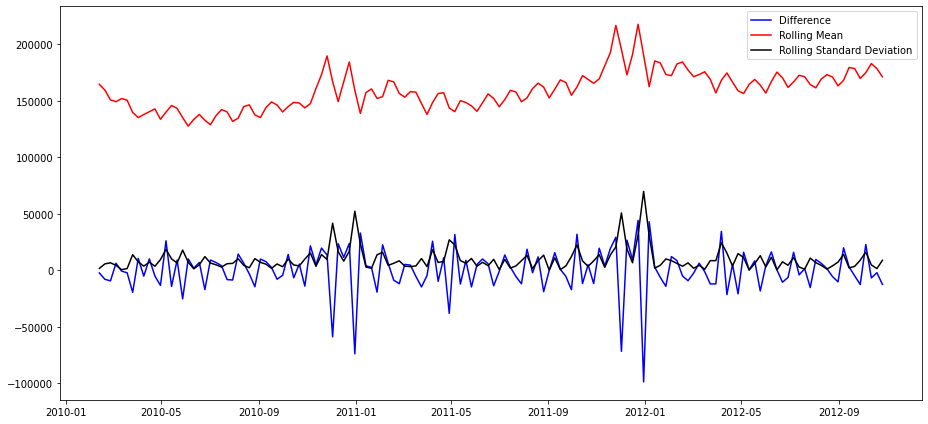

In [10]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [12]:
df_week_lag = df['Weekly_Sales'].shift().dropna()

SHIFT


In [14]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

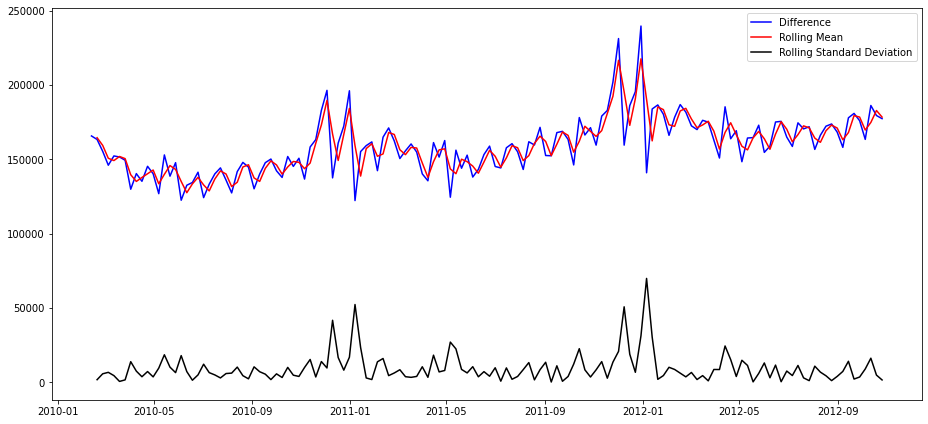

In [15]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [18]:
logged_week = np.log1p(df['Weekly_Sales']).dropna()

LOG

In [19]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

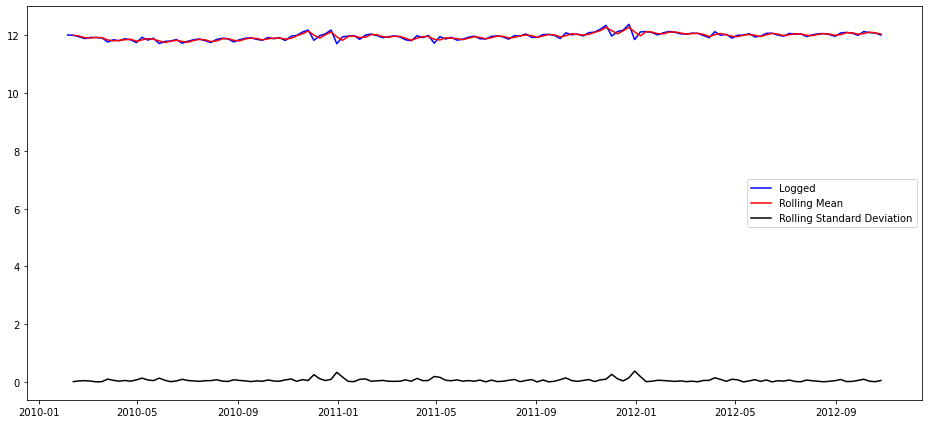

In [22]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [21]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

AUTO-ARIMA MODEL

In [23]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=2258.176, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=2209.853, Time=0.42 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=2215.462, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=2219.670, Time=0.43 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=2199.707, Time=0.47 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=2183.496, Time=0.81 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=2234.460, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=2212.367, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=2214.077, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=2216.687, Time=0.85 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=2189.496, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=2228.942, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=2216.208, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=2207.746, Time=0.60 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=2203.020, Time=1.12 sec
 ARIMA(3,0

ARIMA(maxiter=200, order=(4, 0, 1), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

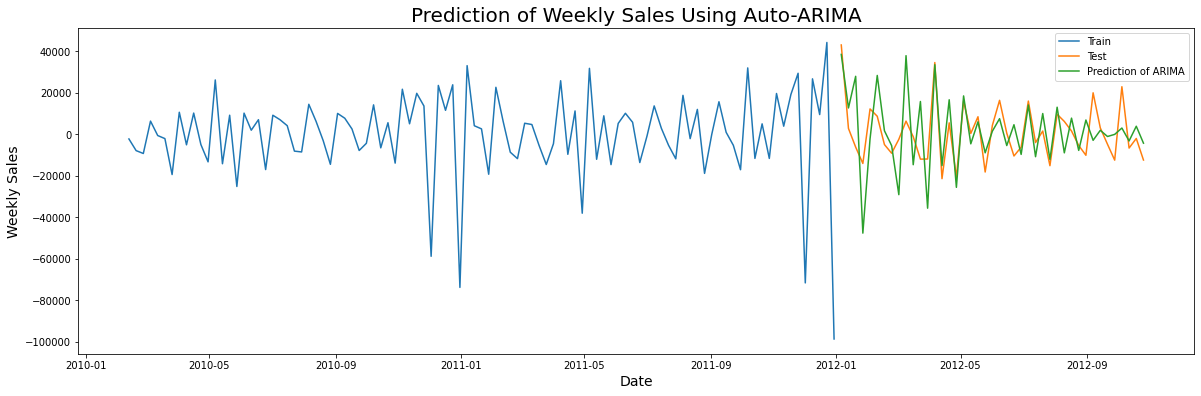

In [24]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

EXPONENTIAL SMOOTHENING MODEL 

<ipython-input-25-b0f7562facbf>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  # If an index is available, see if it is a date-based index or if it
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  return self._initialize_heuristic()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  # Nega

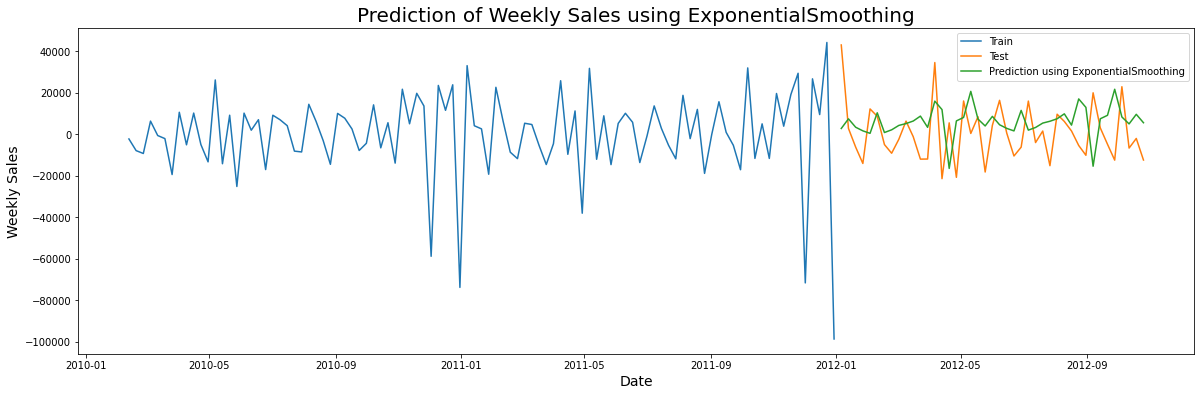

In [25]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

EVALUATION METRICS AND RESULTS

In [26]:
train_data = df[:int(0.7*(len(df)))] # taking train part
test_data = df[int(0.7*(len(df))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in df.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

def wmae_test(test, pred): # WMAE for test 
    weights = X_test['IsHoliday_x'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error
    
wmae_test(test_data_diff, y_pred)

14622.364239355069